# **Q1**

> **(4 points)** *Expressivity of neural networks.* Recall that the functional form for a single neuron is given by $y = σ(⟨w, x⟩ + b)$, where $x$ is the input and $y$ is the output. In this exercise, assume that $x$ and $y$ are 1-dimensional (i.e., they are both just real-valued scalars) and $σ$ is the step activation: $σ(u) = 1$ for $u > 0$ and $0$ otherwise. We will use multiple layers of such neurons to approximate pretty much any function $f$. There is no learning/training required for this problem; you should be able to guess/derive the weights and biases of the
networks by hand.

> a. (1pt) A *box* function with height $h$ and width $δ$ is the function $f(x) = h$ for $0 < x < δ$ and $0$ otherwise. Show that a simple neural network with 2 hidden neurons with step activations can realize this function. Draw this network and identify all the weights and biases. Assume that the output neuron only sums up inputs and does not have a nonlinearity. Explain your reasoning clearly why your network recreates the box function, and list any assumptions you made in your reasoning.
  
> b. (2pts) Now suppose that f is *any arbitrary, smooth, bounded* function defined over an interval $[−B, B]$. (You can ignore what happens to the function outside this interval, or just assume it is zero). Use part a to show that this function can be closely approximated by a neural network with a hidden layer of neurons. You don’t need a rigorous mathematical proof here; a handwavy argument or even a sketched figure is okay here, as long as you convey to us the right intuition and an explanation of your thinking.
  
> c. (1pt) Do you think the argument in part b can be extended to the case of $d$-dimensional inputs? (i.e., where the input $x$ is a vector – think of it as an image, or text query, etc). If yes, comment on potential practical issues (for example, exponential growth in network size). If not, explain why not.


a. We can make a box function by simply adding 2 step functions (which are the activations of the 2 neurons).  The second step function should be inverted horizontally and shifted right by δ, so the weight is -1 and the bias is δ.  The first step function can stay as is.  When we add them, the regions that should be 0 become h, so we must subtract h at the end, which is why the output bias is -h.

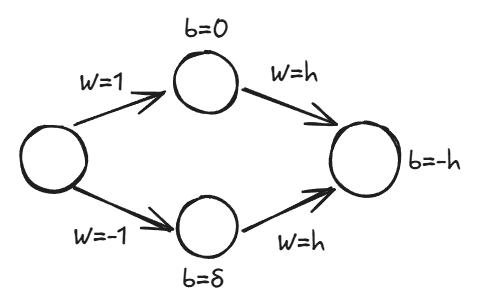

In [ ]:
from IPython.display import Image
Image(filename='drive/MyDrive/CS-GY 6953/hw1/1a.png')

b. We know neurons can realize a box function. More generally, they can realize any stepped peacewise function, by simply adding more neurons. For example,

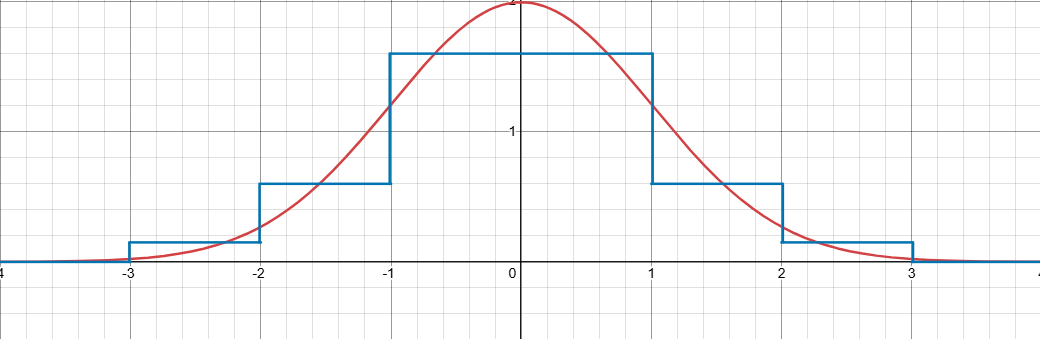

In [ ]:
from IPython.display import Image
Image(filename='drive/MyDrive/CS-GY 6953/hw1/1b.png')

By adding more neurons, we can have more steps that represent smaller and smaller sections of the function we want to approximate.  A sufficient number of neurons will allow us to approximate a function closer and closer.

c. This can be extended to d-dimensional inputs as long as there are a sufficient number of neurons.  The number of neurons usually increases exponentially with respect to d however, since higher dimensional inputs usually have more complex relationships between all the different input variables.  This can be solved by using multiple layers instead of bigger layers.

# **Q2**

> **(4 points)** *Choosing the right scale of initialization.* In this exercise, you will analyze a single fully-connected layer where each weight is drawn from a Gaussian distribution. Your goal is to derive constraints on the variance
of these weights so that the signal neither vanishes nor explodes as it propagates through layers.

> a. Consider the forward pass through a fully-connected linear layer with $n_{in}$ input inputs and $n_{out}$ outputs. Let the weights be initialized as $N(0, σ^2)$ and assume that the inputs $x_i$ to the layer are independent, zero-mean random variables with variance var($x_i$) = $v^2$. Biases are set to zero. If $a_j$ is the activation of the $j^{th}$ neuron, provide a step-by-step derivation to calculate var($a_j$) in terms of $σ^2$, $v^2$, and $n_{in}$.
  
> b. Explain why, if $σ^2$ is not chosen appropriately, the variance of $a_j$ could either vanish (becoming too small) or explode (becoming too large) as a function of $n_{in}$. Use this explanation to get a rough thumb rule on how $σ^2$ should be chosen depending on the number of inputs (also called the *fan-in*.)

> c. Now consider the alternate situation where each output neuron is equipped with the ReLU activation function. Your answer to the thumb rule question in part b would be essentially the same, but scaled by a constant factor. What is this factor? Give a short argument.

> d. As we discuss in class, during the backward pass the gradients flowing back to the input neurons can be calculated as a matrix-vector multiplication with the transpose of the weight matrix $W$ times the gradients at the output neurons. Assuming the output gradients are independent and identically distributed with variance $g^2$, what is the thumb rule to make gradients neither vanish nor explode?
  
> e. So for *both* forward and backward passes to not vanish or explode, what would be a good strategy to pick the initialization variance? *(If you did your calculations correctly, you will arrive at a rule which is sometimes called the Xavier/Glorot initialization.)*

*Attribution: ChatGPT was consulted for some parts of this question.*

a. We know $a_j = \sum\limits_{i=1}^{n_{in}} w_{ji}x_i$, where $w_{ji}$ is the weight for input $x_i$ and output $a_j$.  The variance of $w_{ji}x_i$ must be the variance of $w_i$ * the variance of $x_i$, which is $σ^2v^2$.  Summing across $i$, the total variance is $n_{in}σ^2v^2$.

b. If $σ^2$ is too small, $n_{in}σ^2v^2$ will become very small as well.  Same case for when $σ^2$ is too big.  To avoid this, $σ^2$ should be chosen to be $1/n_{in}$ such that $n_{in}σ^2 = 1$.  This will cause the activation to have the same variance $v^2$ as the input.

c. For ReLU, only positive values output non-zero values, negative inputs all become 0 with ReLU.  Since the inputs are centered around 0, we can assume about half are lost because of ReLU, so we can scale the variance by 2 such that the variance is chosen to be $2/n_{in}$ to take this into account.

d. Similar to b), the variance should be $1/n_{out}$.

e. For both forward and backward passes to work properly, we should combine b) and d).  The average of $n_{in}$ and $n_{out}$ is $(n_{in}+n_{out})/2$, so we should initialize with a variance of $1/((n_{in}+n_{out})/2)$ = $2/(n_{in}+n_{out})$, which is equivalent to the Xavier/Glorot initialization.

# **Q3**

> **(3 points)** *Improving the FashionMNIST classifier.* In the first demo ([link](https://github.com/kvgarimella/dl-demos/blob/main/demo01-basics.ipynb)), we trained a simple logistic regression model to classify MNIST digits. Repeat the same experiment, but now use a (dense) neural network with three (3) hidden layers with 256, 128, and 64 neurons respectively, all with ReLU activations. Display train- and test-loss curves, and report test accuracies of your final model. You may have to tweak the total number of training epochs to get reasonable accuracy. Finally, draw any 3 random image samples from the test dataset, visualize the predicted class probabilities for each sample, and comment on what you can observe from these plots.

*Attribution: https://pytorch.org/examples/, https://github.com/pytorch/examples/blob/main/mnist/main.py*

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 4)

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    # first, flatten each 28*28 image to a 784 vector
    self.layer0 = nn.Flatten()
    # first layer - 256 neurons
    self.layer1 = nn.Linear(28**2, 256)
    # second layer - 128 neurons
    self.layer2 = nn.Linear(256, 128)
    # third layer - 64 neurons
    self.layer3 = nn.Linear(128, 64)
    # output layer - 10 classes
    self.layer4 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.layer0(x)
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = self.layer4(x)
    # apply log softmax for probabilities
    output = F.log_softmax(x, dim=1)
    return output

In [ ]:
train_set = datasets.FashionMNIST('.', train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.FashionMNIST('.', train=False, download=True, transform=transforms.ToTensor())
batch_size = 256
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [ ]:
device = torch.device('cuda')
model = model.to(device)

train_loss, test_loss = [], []

for epoch in range(5):
  model.train()
  losses = []
  for batch, (x, y) in tqdm(enumerate(train_loader), total=int(len(train_loader.dataset) / batch_size)):
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    pred = model(x)
    # log-likelihood loss since log softmax has already been applied
    loss = F.nll_loss(pred, y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
  train_loss.append(sum(losses) / len(losses))

  with torch.no_grad():
    acc = 0
    losses = []
    for batch, (x, y) in enumerate(test_loader):
      x, y = x.to(device), y.to(device)
      pred = model(x)
      loss = F.nll_loss(pred, y)
      losses.append(loss.item())
      # get predictions by getting the argmax for each sample
      pred = pred.argmax(dim=1, keepdim=True)
      acc += pred.eq(y.view_as(pred)).sum().item()
    test_loss.append(sum(losses) / len(losses))

    acc /= len(test_loader.dataset)
    print('Accuracy: ', acc)

  0%|          | 0/234 [00:00<?, ?it/s]

Accuracy:  0.8195


  0%|          | 0/234 [00:00<?, ?it/s]

Accuracy:  0.858


  0%|          | 0/234 [00:00<?, ?it/s]

Accuracy:  0.8595


  0%|          | 0/234 [00:00<?, ?it/s]

Accuracy:  0.8605


  0%|          | 0/234 [00:00<?, ?it/s]

Accuracy:  0.8525


The model was able to learn quite quickly, achieving 81.95% accuracy after the 1st epoch with a batch size of 256.  After epoch 5, it didn't change much, achieving a maximum accuracy of 86.05%.

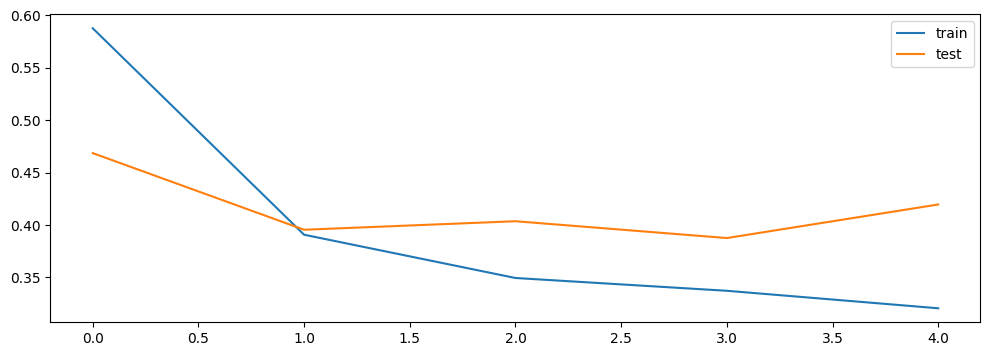

In [ ]:
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.show()

Most of the improvement was made after the 1st epoch, after which not much improvement was made.  This dataset is relatively simple so the model can learn after just a few batches.  Test loss is higher than train, probably because the model is overfitting a little.

The output classes are as follows -

0.  T-shirt/top
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot



<BarContainer object of 10 artists>

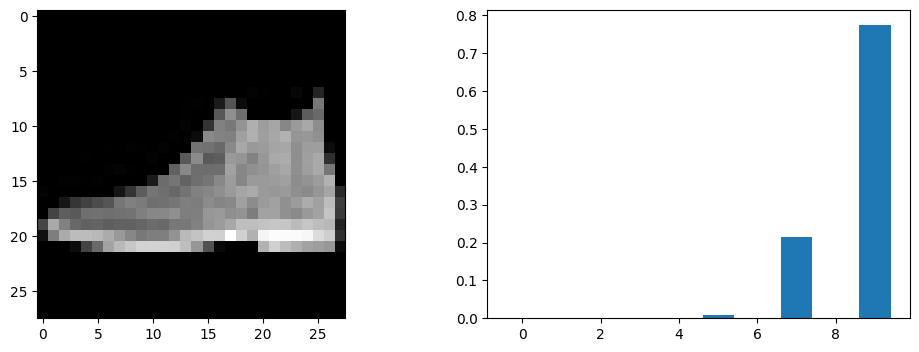

In [ ]:
idx = 0

plt.subplot(1, 2, 1)
plt.imshow(test_set[idx][0].squeeze(), cmap=plt.cm.gray)

plt.subplot(1, 2, 2)
pred = model(test_set[idx][0].to(device))
# np.exp must be applied since log softmax was used in the model
plt.bar(range(10), height=np.exp(pred.cpu().detach().numpy()[0]))

A sample of an ankle boot.  The probability is about 77% ankle boot, perhaps with more training it can reinforce this so the probability is even higher.  However, this makes sense, ankle boots and sneakers probably look pretty similar.

<BarContainer object of 10 artists>

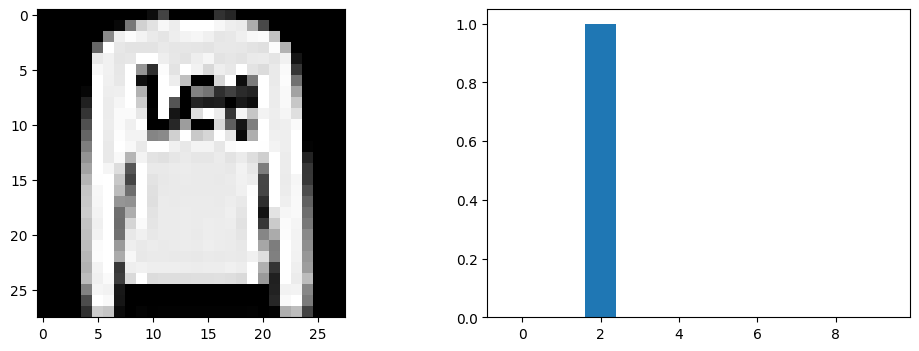

In [ ]:
idx = 1

plt.subplot(1, 2, 1)
plt.imshow(test_set[idx][0].squeeze(), cmap=plt.cm.gray)

plt.subplot(1, 2, 2)
pred = model(test_set[idx][0].to(device))
plt.bar(range(10), height=np.exp(pred.cpu().detach().numpy()[0]))

A sample of a pullover.  The probability is almost 100% pullover.

<BarContainer object of 10 artists>

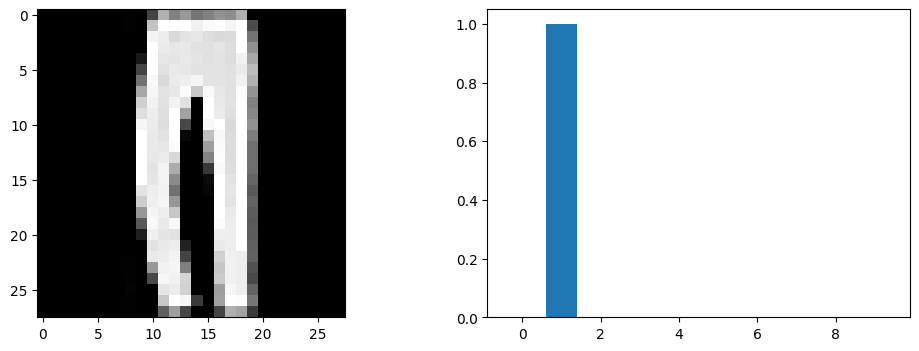

In [ ]:
idx = 2

plt.subplot(1, 2, 1)
plt.imshow(test_set[idx][0].squeeze(), cmap=plt.cm.gray)

plt.subplot(1, 2, 2)
pred = model(test_set[idx][0].to(device))
plt.bar(range(10), height=np.exp(pred.cpu().detach().numpy()[0]))

A sample of a pair of trousers.  The probability is almost 100% trousers.

# **Q4**

> **(4 points)** *Implementing back-propagation in Python from scratch.* Open the (incomplete) Jupyter notebook provided as an attachment to this homework and complete the missing items. In the second demo, we worked with autodiff. Autodiff enables us to implicitly store how to calculate the gradient when we call backward. We implemented some basic operations (addition, multiplication, power, and ReLU). In this homework problem, you will implement backprop for more complicated operations directly. Instead of using autodiff, you will manually compute the gradient of the loss function for each parameter.

In this problem we will train a neural network from scratch using numpy. In practice, you will never need to do this (you'd just use TensorFlow or PyTorch). But hopefully this will give us a sense of what's happening under the hood.

For training/testing, we will use the standard MNIST benchmark consisting of images of handwritten images.



In the second demo, we worked with autodiff. Autodiff enables us to implicitly store how to calculate the gradient when we call backward. We implemented some basic operations (addition, multiplication, power, and ReLU). In this homework problem, you will implement backprop for more complicated operations directly. Instead of using autodiff, you will manually compute the gradient of the loss function for each parameter.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

plt.imshow(x_train[0],cmap='gray');

Loading MNIST is the only place where we will use TensorFlow; the rest of the code will be pure numpy.

Let us now set up a few helper functions. We will use sigmoid activations for neurons, the softmax activation for the last layer, and the cross entropy loss.

In [ ]:
import numpy as np

def sigmoid(x):
  # Numerically stable sigmoid function based on
  # http://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/

  x = np.clip(x, -500, 500) # We get an overflow warning without this

  return np.where(
    x >= 0,
    1 / (1 + np.exp(-x)),
    np.exp(x) / (1 + np.exp(x))
  )

def dsigmoid(x): # Derivative of sigmoid
  return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
  # Numerically stable softmax based on (same source as sigmoid)
  # http://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/
  b = x.max()
  y = np.exp(x - b)
  return y / y.sum()

def cross_entropy_loss(y, yHat):
  return -np.sum(y * np.log(yHat))

def integer_to_one_hot(x):
  # x: integer to convert to one hot encoding
  result = np.zeros(10)
  result[x] = 1
  return result

OK, we are now ready to build and train our model. The input is an image of size 28x28, and the output is one of 10 classes. So, first:

Q1. Initialize a 2-hidden layer neural network with 32 neurons in each hidden layer, i.e., your layer sizes should be:

784 -> 32 -> 32 -> 10

If the layer is $n_{in} \times n_{out}$ your layer weights should be initialized by sampling from a normal distribution with mean zero and variance 1/$\max(n_{in},n_{out})$.

In [ ]:
import math

# Initialize weights of each layer with a normal distribution of mean 0 and
# standard deviation 1/sqrt(n), where n is the number of inputs.
# This means the weighted input will be a random variable itself with mean
# 0 and standard deviation close to 1 (if biases are initialized as 0, standard
# deviation will be exactly 1)

from numpy.random import default_rng

rng = default_rng(80085)

# Q1. Fill initialization code here.
# ...

weights1 = rng.normal(0, 1/(784**.5), size=(784, 32))
biases1 = np.zeros((32))

weights2 = rng.normal(0, 1/(32 ** .5), size=(32, 32))
biases2 = np.zeros((32))

weights3 = rng.normal(0, 1/(32**.5), size=(32, 10))
biases3 = np.zeros((10))

Next, we will set up the forward pass. We will implement this by looping over the layers and successively computing the activations of each layer.

Q2. Implement the forward pass for a single sample, and for the entire dataset.


Right now, your network weights should be random, so doing a forward pass with the data should not give you any meaningful information. Therefore, in the last line, when you calculate test accuracy, it should be somewhere around 1/10 (i.e., a random guess).

In [ ]:
def feed_forward_sample(sample, y):
  """ Forward pass through the neural network.
    Inputs:
      sample: 1D numpy array. The input sample (an MNIST digit).
      label: An integer from 0 to 9.

    Returns: the cross entropy loss, most likely class
  """
  # Q2. Fill code here.
  # ...
  x = sample.flatten()
  x = sigmoid(np.add(np.matmul(x, weights1), biases1))
  x = sigmoid(np.add(np.matmul(x, weights2), biases2))
  y_hat = softmax(np.add(np.matmul(x, weights3), biases3))

  loss = cross_entropy_loss(integer_to_one_hot(y), y_hat)
  one_hot_guess = np.argmax(y_hat)

  return loss, one_hot_guess


def feed_forward_dataset(x, y):
  losses = np.empty(x.shape[0])
  one_hot_guesses = np.empty((x.shape[0], 10))

  # ...
  # Q2. Fill code here to calculate losses, one_hot_guesses
  # ...
  for sample in range(x.shape[0]):
    loss, one_hot_guess = feed_forward_sample(x[sample, :, :], y[sample])
    losses[sample] = loss
    one_hot_guesses[sample, :] = integer_to_one_hot(one_hot_guess)

  y_one_hot = np.zeros((y.size, 10))
  y_one_hot[np.arange(y.size), y] = 1

  correct_guesses = np.sum(y_one_hot * one_hot_guesses)
  correct_guess_percent = format((correct_guesses / y.shape[0]) * 100, ".2f")

  print("\nAverage loss:", np.round(np.average(losses), decimals=2))
  print("Accuracy (# of correct guesses):", correct_guesses, "/", y.shape[0], "(", correct_guess_percent, "%)")

def feed_forward_training_data():
  print("Feeding forward all training data...")
  feed_forward_dataset(x_train, y_train)
  print("")

def feed_forward_test_data():
  print("Feeding forward all test data...")
  feed_forward_dataset(x_test, y_test)
  print("")

feed_forward_test_data()

Feeding forward all test data...

Average loss: 2.37
Accuracy (# of correct guesses): 880.0 / 10000 ( 8.80 %)



OK, now we will implement the backward pass using backpropagation. We will keep it simple and just do training sample-by-sample (no minibatching, no randomness).

Q3: Compute the gradient of all the weights and biases by backpropagating derivatives all the way from the output to the first layer.





In [ ]:
def train_one_sample(sample, y, weights, biases, learning_rate=0.003):
  weights1, weights2, weights3 = weights[0], weights[1], weights[2]
  biases1, biases2, biases3 = biases[0], biases[1], biases[2]

  a = sample.flatten()

  # We will store each layer's activations to calculate gradient
  activations = []

  # Forward pass

  # Q3. This should be the same as what you did in feed_forward_sample above.
  # ...
  z1 = np.add(np.matmul(a, weights1), biases1)
  a1 = sigmoid(z1)
  z2 = np.add(np.matmul(a1, weights2), biases2)
  a2 = sigmoid(z2)
  z3 = np.add(np.matmul(a2, weights3), biases3)
  y_hat = softmax(z3)

  loss = cross_entropy_loss(integer_to_one_hot(y), y_hat)

  # Backward pass

  # Q3. Implement backpropagation by backward-stepping gradients through each layer.
  # You may need to be careful to make sure your Jacobian matrices are the right shape.
  # At the end, you should get two vectors: weight_gradients and bias_gradients.
  # ...
  d3 = y_hat - integer_to_one_hot(y)
  weight_gradients3 = np.matmul(np.expand_dims(a2.transpose(), axis=1), np.expand_dims(d3, axis=0))
  bias_gradients3 = d3

  d2 = np.matmul(np.expand_dims(d3, axis=0), weights3.transpose())
  weight_gradients2 = np.matmul(np.expand_dims(a1.transpose(), axis=1), (d2 * np.expand_dims(dsigmoid(z2), axis=0)))
  bias_gradients2 = np.matmul(d2, dsigmoid(z2))

  d1 = np.matmul(d2 * np.expand_dims(dsigmoid(z2), axis=0), weights2.transpose())
  weight_gradients1 = np.matmul(np.expand_dims(a.transpose(), axis=1), (d1 * np.expand_dims(dsigmoid(z1), axis=0)))
  bias_gradients1 = np.matmul(d1, dsigmoid(z1))

  # Update weights & biases based on your calculated gradient
  weights3 -= weight_gradients3 * learning_rate
  biases3 -= bias_gradients3.flatten() * learning_rate

  weights2 -= weight_gradients2 * learning_rate
  biases2 -= bias_gradients2.flatten() * learning_rate

  weights1 -= weight_gradients1 * learning_rate
  biases1 -= bias_gradients1.flatten() * learning_rate

  return [weights1, weights2, weights3], [biases1, biases2, biases3]

Finally, train for 3 epochs by looping over the entire training dataset 3 times.

Q4. Train your model for 3 epochs.

In [ ]:
def train_one_epoch(learning_rate=0.003):
  print("Training for one epoch over the training dataset...")

  # Q4. Write the training loop over the epoch here.
  # ...
  weights, biases = [weights1, weights2, weights3], [biases1, biases2, biases3]
  for i in range(x_train.shape[0]):
    weights, biases = train_one_sample(x_train[i, :, :].squeeze(), y_train[i], weights, biases, learning_rate)

  print("Finished training.\n")

feed_forward_test_data()

def test_and_train():
  train_one_epoch()
  feed_forward_test_data()

for i in range(3):
  test_and_train()

Feeding forward all test data...

Average loss: 2.37
Accuracy (# of correct guesses): 880.0 / 10000 ( 8.80 %)

Training for one epoch over the training dataset...
Finished training.

Feeding forward all test data...

Average loss: 1.22
Accuracy (# of correct guesses): 5960.0 / 10000 ( 59.60 %)

Training for one epoch over the training dataset...
Finished training.

Feeding forward all test data...

Average loss: 0.98
Accuracy (# of correct guesses): 6371.0 / 10000 ( 63.71 %)

Training for one epoch over the training dataset...
Finished training.

Feeding forward all test data...

Average loss: 0.87
Accuracy (# of correct guesses): 7134.0 / 10000 ( 71.34 %)




That's it!

Your code is probably very time- and memory-inefficient; that's ok. There is a ton of optimization under the hood in professional deep learning frameworks which we won't get into.

If everything is working well, you should be able to raise the accuracy from ~10% to ~70% accuracy after 3 epochs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install nbconvert
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

In [151]:
!jupyter nbconvert --to pdf --output hw1.pdf 'drive/MyDrive/CS-GY 6953/hw1/HW 1.ipynb'

[NbConvertApp] Converting notebook drive/MyDrive/CS-GY 6953/hw1/HW 1.ipynb to pdf
[NbConvertApp] Support files will be in hw1_files/
[NbConvertApp] Making directory ./hw1_files
[NbConvertApp] Writing 74836 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 190940 bytes to drive/MyDrive/CS-GY 6953/hw1/hw1.pdf
